In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Aviation_data.csv', encoding = 'ISO-8859-1', low_memory = False)

In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.shape

(90348, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [7]:
df_clean = df.dropna(subset=['Make'])

In [8]:
df_clean.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Latitude                  54466
Longitude                 54475
Airport.Code              38591
Airport.Name              36051
Injury.Severity             983
Aircraft.damage            3176
Aircraft.Category         56551
Registration.Number        1279
Make                          0
Model                        49
Amateur.Built               100
Number.of.Engines          6035
Engine.Type                7026
FAR.Description           56854
Schedule                  76283
Purpose.of.flight          6150
Air.carrier               72202
Total.Fatal.Injuries      11394
Total.Serious.Injuries    12500
Total.Minor.Injuries      11922
Total.Uninjured            5901
Weather.Condition          4454
Broad.phase.of.flight     27113
Report.Status              6349
Publication.Date          15227
dtype: i

In [9]:
df_clean['Make'].value_counts()

Cessna                      22227
Piper                       12029
CESSNA                       4922
Beech                        4330
PIPER                        2841
                            ...  
DANTONIO                        1
Keener                          1
PIPER/WALLY'S FLYERS INC        1
Jr. Ace                         1
BLUE SIDE UP INC                1
Name: Make, Length: 8237, dtype: int64

In [10]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].str.strip().str.upper()

C:\Users\yasit\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [11]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
    "AMERICAN LEGAND AIRCRAFT": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT CO": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT CO.": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT COMPA": "AMERICAN LEGEND"})

In [12]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
 "CESNA": "CESSNA",
    "CESSNA AIRCRAFT": "CESSNA",
    "CESSNA AIRCRAFT CO": "CESSNA",
    "CESSNA AIRCRAFT CO.": "CESSNA",
    "CESSNA AIRCRAFT COMPANY": "CESSNA",
    "CESSNA ECTOR":"CESSNA",
    "CESSNA REEMS":"CESSNA",
    "CESSNA REIMS":"CESSNA",
    "CESSNA ROBERTSON":"CESSNA",
    "CESSNA SKYHAWK II":"CESSNA",
    "CESSNA SOLOY":"CESSNA",
    "CESSNA WREN":"CESSNA",
    "CESSNA/AIR REPAIR INC":"CESSNA",
    "CESSNA/WEAVER":"CESSNA"})

In [13]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"PIPER / LAUDEMAN":"PIPER",
"PIPER AEROSTAR":"PIPER",
"PIPER AIRCRAFT":"PIPER",
"PIPER AIRCRAFT CORPORATION":"PIPER",
"PIPER AIRCRAFT INC":"PIPER",
"PIPER AIRCRAFT, INC.":"PIPER",
"PIPER CUB CRAFTERS":"PIPER",
"PIPER PAWNEE":"PIPER",
"PIPER-AEROSTAR":"PIPER",
"PIPER-HARRIS":"PIPER",
"PIPER/CUB CRAFTERS":"PIPER",
"PIPER/STEVENS":"PIPER",
"PIPER/WALLY'S FLYERS INC":"PIPER"})

In [14]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"BOEING (STEARMAN)":"BOEING",
"BOEING - CANADA (DE HAVILLAND)":"BOEING",
"BOEING 777-306ER":"BOEING",
"BOEING COMMERCIAL AIRPLANE GRO":"BOEING",
"BOEING COMPANY":"BOEING",
"BOEING COMPANY, LONG BEACH DIV":"BOEING",
"BOEING HELICOPTERS DIV.":"BOEING",
"BOEING OF CANADA/DEHAV DIV":"BOEING",
"BOEING STEARMAN":"BOEING",
"BOEING VERTOL":"BOEING",
"BOEING-BROWN":"BOEING",
"BOEING-STEARMAN":"BOEING",
"BOEING-VERTOL":"BOEING"})

In [15]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"ROBINSON HELICOPTER":"ROBINSON",
"ROBINSON HELICOPTER CO":"ROBINSON",
"ROBINSON HELICOPTER CO INC":"ROBINSON",
"ROBINSON HELICOPTER CO.":"ROBINSON",
"ROBINSON HELICOPTER COMPANY":"ROBINSON",
"ROBINSON HELICOPTERS":"ROBINSON",
"ROBINSON MICHAEL E":"ROBINSON",
"ROBINSON STEWART J":"ROBINSON"})

In [16]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"BEECH AIRCRAFT":"BEECH",
"BEECH AIRCRAFT CO.":"BEECH",
"BEECH AIRCRAFT CORP":"BEECH",
"BEECH AIRCRAFT CORPORATION":"BEECH",
"BEECHCRAFT":"BEECH",
"BEECHCRAFT CORPORATION":"BEECH",
"BEECHER":"BEECH"})

In [17]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"MCDONNELL DOUGLAS CORPORATION":"MCDONALD DOUGLAS",
    "MCDONNELL-DOUGLAS":"MCDONALD DOUGLAS",
    "MCDONNELL DOUGLAS":"MCDONALD DOUGLAS",
    "MCDONNELL DOUGLAS AIRCRAFT CO":"MCDONALD DOUGLAS"
})

In [18]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"AIRBUS INDUSTRIE":"AIRBUS",
})

In [19]:
pd.set_option('display.max_rows', None)

In [20]:
#Sanity Check
df_clean['Make'].value_counts()

CESSNA                               27213
PIPER                                14934
BEECH                                 5413
BOEING                                2824
BELL                                  2722
ROBINSON                              1682
MOONEY                                1334
GRUMMAN                               1172
BELLANCA                              1045
HUGHES                                 932
SCHWEIZER                              773
AIR TRACTOR                            691
AERONCA                                636
MCDONALD DOUGLAS                       619
MAULE                                  589
CHAMPION                               519
AIRBUS                                 455
STINSON                                439
AERO COMMANDER                         429
DE HAVILLAND                           422
LUSCOMBE                               414
AEROSPATIALE                           388
NORTH AMERICAN                         383
TAYLORCRAFT

In [21]:
df_clean.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Latitude                  54466
Longitude                 54475
Airport.Code              38591
Airport.Name              36051
Injury.Severity             983
Aircraft.damage            3176
Aircraft.Category         56551
Registration.Number        1279
Make                          0
Model                        49
Amateur.Built               100
Number.of.Engines          6035
Engine.Type                7026
FAR.Description           56854
Schedule                  76283
Purpose.of.flight          6150
Air.carrier               72202
Total.Fatal.Injuries      11394
Total.Serious.Injuries    12500
Total.Minor.Injuries      11922
Total.Uninjured            5901
Weather.Condition          4454
Broad.phase.of.flight     27113
Report.Status              6349
Publication.Date          15227
dtype: i

In [22]:
df_clean['Aircraft.Category'].value_counts()

Airplane             27608
Helicopter            3437
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [23]:
df_clean.loc[(df_clean['Make'] == 'CESSNA')&(df_clean['Model'] == '180')][['Make','Model','Aircraft.Category']]

,Make,Model,Aircraft.Category
6,CESSNA,180,NaN
17,CESSNA,180,Airplane
77,CESSNA,180,Airplane
248,CESSNA,180,Airplane
356,CESSNA,180,Airplane
393,CESSNA,180,Airplane
530,CESSNA,180,Airplane
715,CESSNA,180,Airplane
730,CESSNA,180,Airplane
823,CESSNA,180,Airplane


In [24]:
df_clean['Make_Model'] = df_clean['Make']+ " "+ df_clean['Model']

<ipython-input-24-5af32d7e7560>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Make_Model'] = df_clean['Make']+ " "+ df_clean['Model']


In [25]:
List_Make = df_clean.loc[df_clean['Aircraft.Category'] =='Airplane']
List_Make = List_Make['Make_Model'].unique()

In [26]:
mask = (df_clean['Aircraft.Category'].isnull()) & (df_clean['Make_Model'].isin(List_Make))
df_clean.loc[mask, 'Aircraft.Category'] = 'Airplane'

C:\Users\yasit\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [27]:
df_clean['Aircraft.Category'].value_counts()

Airplane             68076
Helicopter            3437
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [28]:
#Sanity Check
df_clean.loc[(df_clean['Make'] == 'CESSNA')&(df_clean['Model'] == '180')][['Make','Model','Aircraft.Category']]

,Make,Model,Aircraft.Category
6,CESSNA,180,Airplane
17,CESSNA,180,Airplane
77,CESSNA,180,Airplane
248,CESSNA,180,Airplane
356,CESSNA,180,Airplane
393,CESSNA,180,Airplane
530,CESSNA,180,Airplane
715,CESSNA,180,Airplane
730,CESSNA,180,Airplane
823,CESSNA,180,Airplane


In [29]:
df_clean_aircraft = df_clean.loc[df_clean['Aircraft.Category']=='Airplane',:]

In [30]:
df_clean_aircraft.shape

(68076, 32)

In [31]:
df_clean_aircraft['Datetime'] = pd.to_datetime(df_clean_aircraft['Event.Date'])
df_clean_aircraft['Year_of_Incident']=df_clean_aircraft['Datetime'].dt.year

<ipython-input-31-02561812a85f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_aircraft['Datetime'] = pd.to_datetime(df_clean_aircraft['Event.Date'])
<ipython-input-31-02561812a85f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_aircraft['Year_of_Incident']=df_clean_aircraft['Datetime'].dt.year


In [32]:
df_clean_aircraft= df_clean_aircraft.loc[df_clean_aircraft['Year_of_Incident']>2001]

In [33]:
df_clean_aircraft= df_clean_aircraft.loc[(df_clean_aircraft['Aircraft.damage']!='Minor') & (df_clean_aircraft['Aircraft.damage']!='Unknown')]

In [34]:
df_clean_aircraft['Aircraft.damage'].value_counts()

Substantial    23324
Destroyed       3734
Name: Aircraft.damage, dtype: int64

In [35]:
df_clean_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28626 entries, 51959 to 90347
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                28626 non-null  object        
 1   Investigation.Type      28626 non-null  object        
 2   Accident.Number         28626 non-null  object        
 3   Event.Date              28626 non-null  object        
 4   Location                28621 non-null  object        
 5   Country                 28625 non-null  object        
 6   Latitude                26297 non-null  object        
 7   Longitude               26288 non-null  object        
 8   Airport.Code            18774 non-null  object        
 9   Airport.Name            18915 non-null  object        
 10  Injury.Severity         27957 non-null  object        
 11  Aircraft.damage         27058 non-null  object        
 12  Aircraft.Category       28626 non-null  ob

In [36]:
df_clean_aircraft['Total.Fatal.Injuries'] = df_clean_aircraft['Total.Fatal.Injuries'].fillna(0)

In [37]:
df_clean_aircraft['Total.Serious.Injuries'] = df_clean_aircraft['Total.Serious.Injuries'].fillna(0)

In [38]:
df_clean_aircraft['Total.Minor.Injuries'] = df_clean_aircraft['Total.Minor.Injuries'].fillna(0)

In [39]:
df_clean_aircraft['Total.Uninjured'] = df_clean_aircraft['Total.Uninjured'].fillna(0)

In [40]:
df_clean_aircraft['Uninjured_Rate'] = df_clean_aircraft['Total.Uninjured'] / (
     df_clean_aircraft['Total.Serious.Injuries'] + df_clean_aircraft['Total.Minor.Injuries'] + df_clean_aircraft['Total.Uninjured']+df_clean_aircraft['Total.Fatal.Injuries'])

In [41]:
df_clean_aircraft['Fatal_Rate'] = df_clean_aircraft['Total.Fatal.Injuries'] / (
     df_clean_aircraft['Total.Serious.Injuries'] + df_clean_aircraft['Total.Minor.Injuries'] + df_clean_aircraft['Total.Uninjured']+df_clean_aircraft['Total.Fatal.Injuries'])

In [42]:
df_clean_aircraft['Survived_Rate'] = (df_clean_aircraft['Total.Serious.Injuries'] + df_clean_aircraft['Total.Minor.Injuries'] + df_clean_aircraft['Total.Uninjured'])/ (
     df_clean_aircraft['Total.Serious.Injuries'] + df_clean_aircraft['Total.Minor.Injuries'] + df_clean_aircraft['Total.Uninjured']+df_clean_aircraft['Total.Fatal.Injuries'])

In [43]:
df_clean_aircraft['Serious_Rate'] = df_clean_aircraft['Total.Serious.Injuries'] / (
     df_clean_aircraft['Total.Serious.Injuries'] + df_clean_aircraft['Total.Minor.Injuries'] + df_clean_aircraft['Total.Uninjured']+df_clean_aircraft['Total.Fatal.Injuries'])

In [44]:
df_clean_aircraft.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      5
Country                       1
Latitude                   2329
Longitude                  2338
Airport.Code               9852
Airport.Name               9711
Injury.Severity             669
Aircraft.damage            1568
Aircraft.Category             0
Registration.Number         430
Make                          0
Model                        21
Amateur.Built                44
Number.of.Engines          2931
Engine.Type                4396
FAR.Description            5732
Schedule                  26043
Purpose.of.flight          3776
Air.carrier               17871
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          2962
Broad.phase.of.flight     20848
Report.Status              4740
Publication.Date           2028
Make_Mod

In [45]:
df_clean_aircraft['Accident.Number'].nunique()

28608

In [46]:
#Identify duplicate values in accident number
df_clean_aircraft.duplicated() == True
df_clean_aircraft[df_clean_aircraft[['Accident.Number']].duplicated() == True]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Broad.phase.of.flight,Report.Status,Publication.Date,Make_Model,Datetime,Year_of_Incident,Uninjured_Rate,Fatal_Rate,Survived_Rate,Serious_Rate
88599,20220309104747,Incident,DCA22WA089,2022-01-15,"Sukkur, OF",Pakistan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BOEING 737,2022-01-15,2022,NaN,NaN,NaN,NaN
88620,20220801105632,Incident,DCA22WA167,2022-01-22,"Kigali,",Rwanda,001587S,0030822E,NaN,NaN,...,NaN,NaN,NaN,BOEING 737-800,2022-01-22,2022,NaN,NaN,NaN,NaN
88856,20220323104818,Accident,CEN22LA149,2022-03-18,"Grapevine, TX",United States,032530N,0097251W,DFW,Dallas Ft. Worth,...,NaN,The failure of the pilot of the second aircraf...,05-07-2022,CESSNA 208B,2022-03-18,2022,1.0,0.0,1.0,0.0
88947,20220406104897,Accident,WPR22LA143,2022-04-02,"Van Nuys, CA",United States,034137N,1182932W,VNY,Van Nuys,...,NaN,The student pilotÂs failure to maintain suffi...,20-07-2022,CESSNA 172G,2022-04-02,2022,1.0,0.0,1.0,0.0
89300,20220614105258,Incident,DCA22WA130,2022-06-05,"Peshawar, OF",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BOEING 777,2022-06-05,2022,NaN,NaN,NaN,NaN
89494,20220726105577,Incident,DCA22WA158,2022-07-02,"Barcelona,",Spain,411750N,0002442E,LEBL,Barcelona International Airpor,...,NaN,NaN,NaN,BOEING 737,2022-07-02,2022,NaN,NaN,NaN,NaN
89505,20220804105661,Incident,DCA22WA172,2022-07-04,"TBD,",MU,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BOEING 777,2022-07-04,2022,NaN,NaN,NaN,NaN
89594,20220718105496,Accident,ERA22FA318,2022-07-17,"Las Vegas, NV",United States,361239N,1151140W,VGT,NORTH LAS VEGAS,...,NaN,NaN,05-08-2022,CESSNA 172N,2022-07-17,2022,0.0,1.0,0.0,0.0
89668,20220727105589,Accident,ERA22FA338,2022-07-26,"Portland, AR",United States,331336N,0912816W,NaN,NaN,...,NaN,NaN,18-08-2022,AIR TRACTOR INC. AT-802,2022-07-26,2022,0.0,0.5,0.5,0.0
89751,20220808105682,Accident,ERA22LA364,2022-08-06,"Erwinna, PA",United States,040293N,0075559W,9N1,VANSANT,...,NaN,NaN,19-09-2022,WACO UPF-7,2022-08-06,2022,1.0,0.0,1.0,0.0


In [47]:
df_clean_aircraft[df_clean_aircraft['Accident.Number'] == "ERA22LA103"]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Broad.phase.of.flight,Report.Status,Publication.Date,Make_Model,Datetime,Year_of_Incident,Uninjured_Rate,Fatal_Rate,Survived_Rate,Serious_Rate
88568,20220111104514,Accident,ERA22LA103,2022-01-08,"Knoxville, TN",United States,355750N,0835225W,DKX,KNOXVILLE DOWNTOWN ISLAND,...,NaN,The pilot of the Cessna 150Âs failure to avoi...,NaN,CESSNA 150G,2022-01-08,2022,1.0,0.0,1.0,0.0


In [48]:
df_clean_aircraft['Total Survived'] = df_clean_aircraft['Total.Minor.Injuries'] + df_clean_aircraft['Total.Serious.Injuries'] +df_clean_aircraft['Total.Uninjured']

In [49]:
df_clean_aircraft['Number.of.Engines'].value_counts()

1.0    22151
2.0     3439
4.0       64
3.0       35
0.0        4
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

In [50]:
df_filtered = df_clean_aircraft[df_clean_aircraft['Number.of.Engines'] > 0]

In [51]:
df_filtered['Number.of.Engines'].value_counts()

1.0    22151
2.0     3439
4.0       64
3.0       35
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

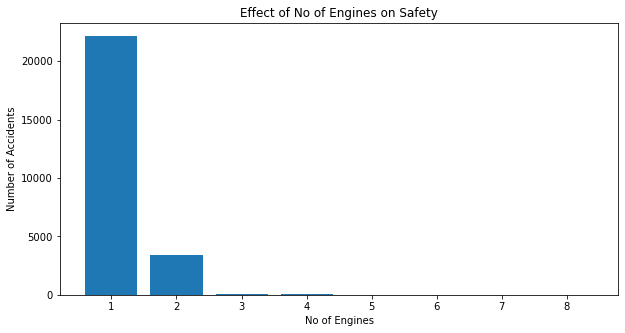

In [53]:
x = df_filtered['Number.of.Engines'].value_counts().sort_index().index
y = df_filtered['Number.of.Engines'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Effect of No of Engines on Safety')
ax.set_xlabel('No of Engines')
ax.set_ylabel('Number of Accidents');

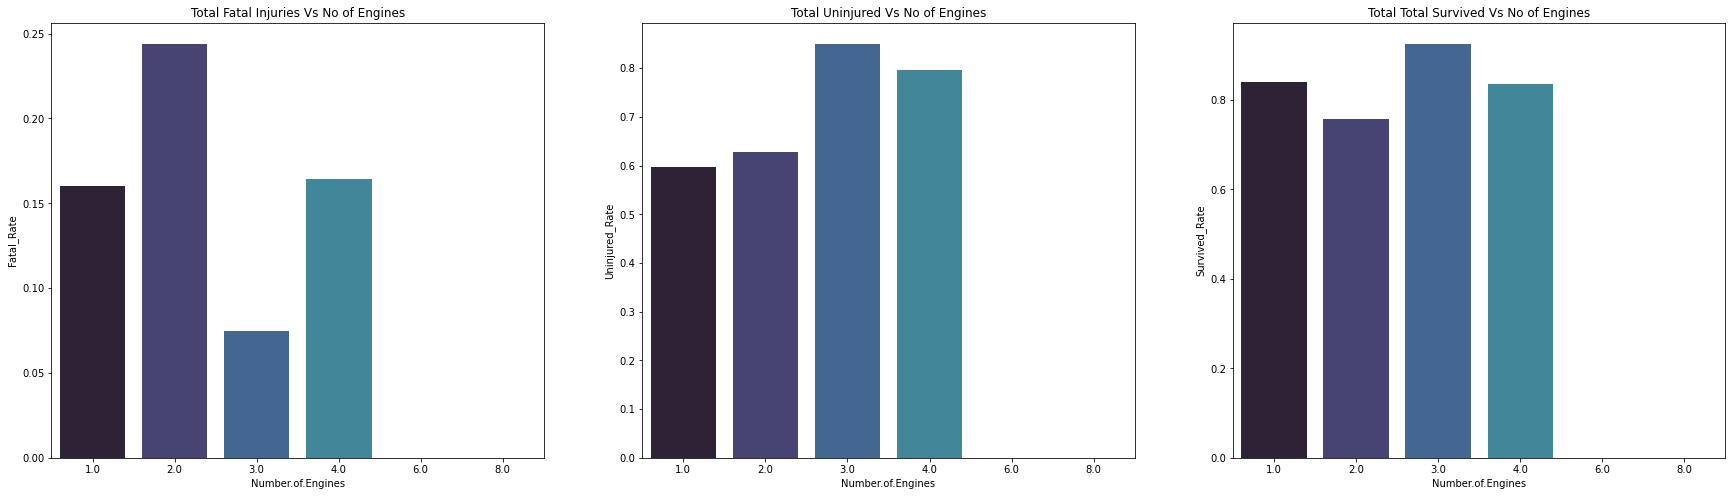

In [54]:
factor_numEngine=  df_filtered.groupby("Number.of.Engines").mean().reset_index()
factor_numEngine

f, axes=plt.subplots(1,3 , figsize= (30,8))
sns.barplot(x = 'Number.of.Engines',y='Fatal_Rate' , data = factor_numEngine.reset_index() , palette = 'mako',ax= axes[0]).set(title='Total Fatal Injuries Vs No of Engines')
sns.barplot(x = 'Number.of.Engines',y='Uninjured_Rate' , data = factor_numEngine.reset_index() , palette = 'mako',ax= axes[1]).set(title='Total Uninjured Vs No of Engines')
sns.barplot(x = 'Number.of.Engines',y='Survived_Rate' , data = factor_numEngine.reset_index() , palette = 'mako',ax= axes[2]).set(title='Total Total Survived Vs No of Engines');

In [55]:
df_clean_aircraft['Aircraft.damage'].value_counts()

Substantial    23324
Destroyed       3734
Name: Aircraft.damage, dtype: int64

In [56]:
pd.crosstab(df_clean_aircraft['Aircraft.damage'],df_clean_aircraft['Number.of.Engines'], dropna=False)

Number.of.Engines,0.0,1.0,2.0,3.0,4.0,6.0,8.0
Aircraft.damage,,,,,,,
Destroyed,0,2249,636,2,7,0,0
Substantial,4,19787,2175,23,27,1,1


Next step is to extract makes with two engines

In [57]:
flight_eng = df_filtered.loc[df_filtered['Number.of.Engines']==2][['Make','Number.of.Engines']]

In [58]:
flight_eng['Make'].nunique()

168

In [59]:
flight_eng['Make'].value_counts()

CESSNA                            739
PIPER                             652
BEECH                             615
BOEING                            396
AIRBUS                            152
EMBRAER                            85
BOMBARDIER INC                     47
AERO COMMANDER                     46
MCDONALD DOUGLAS                   45
LEARJET                            38
SWEARINGEN                         30
BOMBARDIER                         29
MITSUBISHI                         29
RAYTHEON AIRCRAFT COMPANY          25
GRUMMAN                            22
DE HAVILLAND                       22
SMITH                              18
GULFSTREAM AEROSPACE               15
ROCKWELL                           15
CANADAIR                           14
ROCKWELL INTERNATIONAL             14
DOUGLAS                            14
FAIRCHILD                          14
GULFSTREAM                         12
LEARJET INC                        11
DEHAVILLAND                        11
BOMBARDIER, 

In [60]:
df_clean_aircraft['Engine.Type'].value_counts()

Reciprocating      21681
Turbo Prop          1478
Turbo Fan            871
Turbo Jet            145
Unknown               22
Turbo Shaft           16
Geared Turbofan       11
Electric               5
UNK                    1
Name: Engine.Type, dtype: int64

In [61]:
df_clean_aircraft['Engine.Type'].replace(to_replace='UNK', value='Unknown', regex=True, inplace = True)

In [62]:
df_clean_aircraft['Engine.Type'].value_counts()

Reciprocating      21681
Turbo Prop          1478
Turbo Fan            871
Turbo Jet            145
Unknown               23
Turbo Shaft           16
Geared Turbofan       11
Electric               5
Name: Engine.Type, dtype: int64

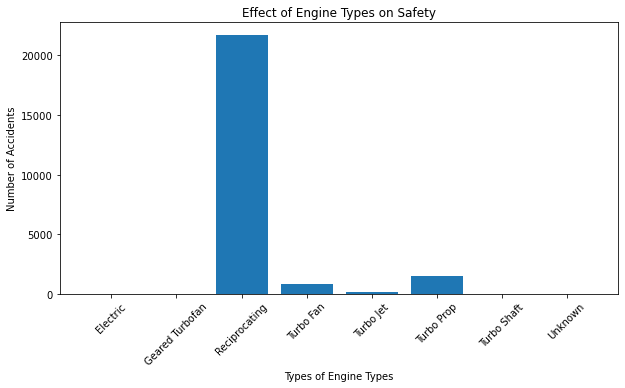

In [63]:
x = df_clean_aircraft['Engine.Type'].value_counts().sort_index().index
y = df_clean_aircraft['Engine.Type'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Effect of Engine Types on Safety')
ax.set_xlabel('Types of Engine Types', loc = 'center')
ax.set_ylabel('Number of Accidents')
plt.xticks(rotation = 45);

In [64]:
df_clean_aircraft['Weather.Condition'].value_counts()

VMC    23931
IMC     1541
Unk      191
UNK        1
Name: Weather.Condition, dtype: int64

In [65]:
df_clean_aircraft['Weather.Condition'].replace(to_replace='Unk', value='UNK', regex=True, inplace = True)

In [66]:
df_clean_aircraft['Weather.Condition'].value_counts()

VMC    23931
IMC     1541
UNK      192
Name: Weather.Condition, dtype: int64

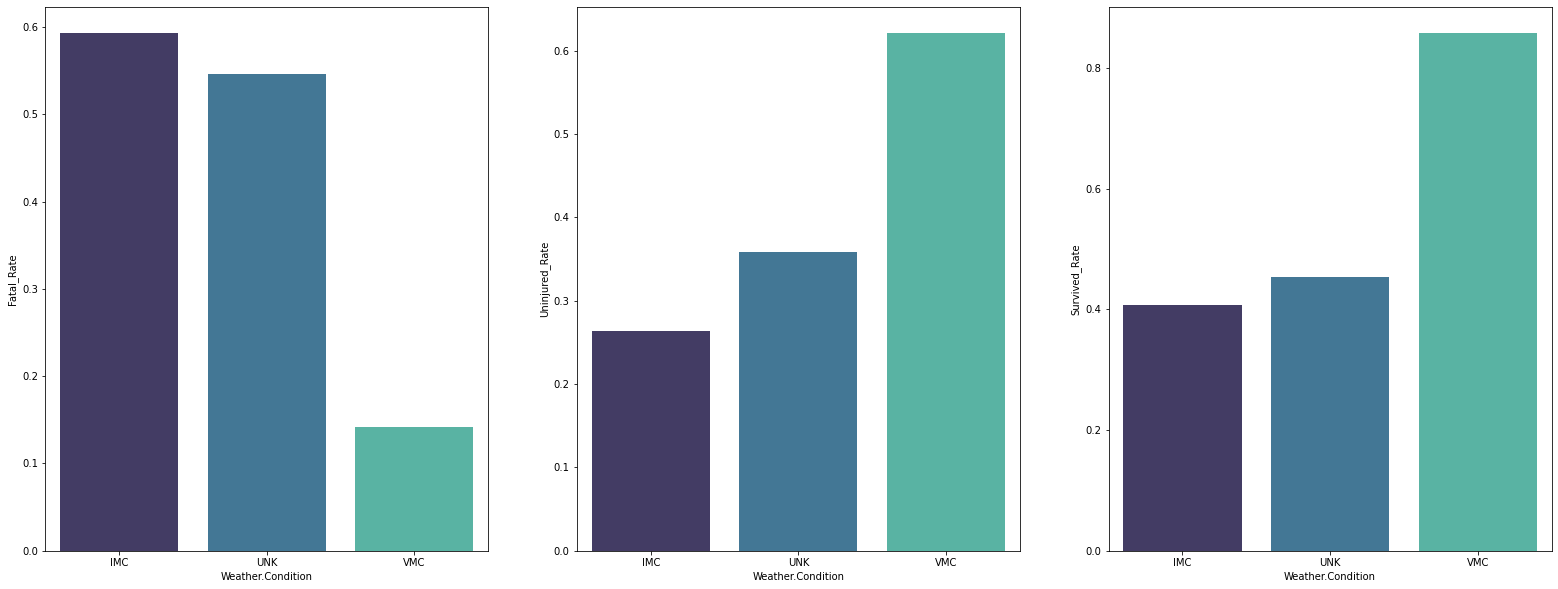

In [67]:
factor_weather= df_clean_aircraft.groupby("Weather.Condition").mean().reset_index()

f, axes=plt.subplots(1,3 , figsize= (27,10))
sns.barplot(x = 'Weather.Condition',y='Fatal_Rate' , data = factor_weather.reset_index() , palette = 'mako',ax= axes[0])
sns.barplot(x = 'Weather.Condition',y='Uninjured_Rate' , data = factor_weather.reset_index() , palette = 'mako',ax= axes[1])
sns.barplot(x = 'Weather.Condition',y='Survived_Rate' , data = factor_weather.reset_index() , palette = 'mako',ax= axes[2]);

In [68]:
df_clean_aircraft['Total_Injuries'] = (
    df_clean_aircraft['Total.Serious.Injuries'] +
    df_clean_aircraft['Total.Minor.Injuries']
)


In [69]:
df_clean_aircraft_damage = df_clean_aircraft.loc[(df_clean_aircraft['Aircraft.damage']!='Minor') & (df_clean_aircraft['Aircraft.damage']!='Unknown')]

In [70]:
df_aircraft_survival = df_clean_aircraft_damage.groupby('Make_Model').agg({
    'Total_Injuries': 'mean',
    'Total.Uninjured': 'mean',
    'Total.Fatal.Injuries': 'mean'
})
df_aircraft_survival['Survived_Rate'] =  (df_aircraft_survival['Total_Injuries']+df_aircraft_survival['Total.Uninjured']) / (
   df_aircraft_survival['Total_Injuries'] + df_aircraft_survival['Total.Uninjured']+df_aircraft_survival['Total.Fatal.Injuries'])

In [71]:
df_aircraft_survival['Total_Passengers'] = df_aircraft_survival['Total_Injuries'] + df_aircraft_survival['Total.Uninjured']+df_aircraft_survival['Total.Fatal.Injuries'] 

In [72]:
Private_Plane = df_aircraft_survival.loc[(df_aircraft_survival['Total_Passengers']>10) & (df_aircraft_survival['Total_Passengers']<30)]

In [73]:
Private_Plane.head()

,Total_Injuries,Total.Uninjured,Total.Fatal.Injuries,Survived_Rate,Total_Passengers
Make_Model,,,,,
AEROSPATIALE ATR-42-300,0.5,21.500000,0.0,1.0,22.000000
AIRBUS 330,11.0,6.000000,0.0,1.0,17.000000
ATR ATR72,0.0,14.166667,0.0,1.0,14.166667
AVIOCAR CASA C212,0.0,0.000000,18.0,0.0,18.000000
BAE JETSTREAM3100,0.0,13.333333,0.0,1.0,13.333333


In [74]:
Private_Plane.loc[Private_Plane['Total_Injuries']>0].sort_values(by = 'Survived_Rate', ascending = False).head(10)

,Total_Injuries,Total.Uninjured,Total.Fatal.Injuries,Survived_Rate,Total_Passengers
Make_Model,,,,,
AEROSPATIALE ATR-42-300,0.500000,21.500000,0.0,1.0,22.000000
DE HAVILLAND DHC-6-300,2.666667,20.666667,0.0,1.0,23.333333
RAYTHEON AIRCRAFT COMPANY 1900D,5.000000,15.000000,0.0,1.0,20.000000
MCDONALD DOUGLAS DC-9-87,1.000000,20.000000,0.0,1.0,21.000000
GULFSTREAM G IV,0.500000,10.000000,0.0,1.0,10.500000
FAIRCHILD Dornier 328-300,1.000000,23.000000,0.0,1.0,24.000000
EMBRAER ERJ 190 100 IGW,0.666667,19.333333,0.0,1.0,20.000000
EMBRAER EMB-135LR,3.666667,22.000000,0.0,1.0,25.666667
EMBRAER 140,1.000000,24.000000,0.0,1.0,25.000000


In [75]:
Private_Plane['injury_ratio'] = (Private_Plane['Total_Injuries']+ Private_Plane['Total.Fatal.Injuries'])/((Private_Plane['Total_Injuries']+ Private_Plane['Total.Fatal.Injuries'])+Private_Plane['Total.Uninjured'])

<ipython-input-75-9f3b3f29a506>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Private_Plane['injury_ratio'] = (Private_Plane['Total_Injuries']+ Private_Plane['Total.Fatal.Injuries'])/((Private_Plane['Total_Injuries']+ Private_Plane['Total.Fatal.Injuries'])+Private_Plane['Total.Uninjured'])


In [76]:
Private_Plane.loc[Private_Plane['Total_Injuries']>0].sort_values(by =['Survived_Rate','injury_ratio'],ascending =[False,True]).head(10)

,Total_Injuries,Total.Uninjured,Total.Fatal.Injuries,Survived_Rate,Total_Passengers,injury_ratio
Make_Model,,,,,,
AEROSPATIALE ATR-42-300,0.500000,21.500000,0.0,1.0,22.000000,0.022727
BOMBARDIER CL600 2C10,0.333333,10.500000,0.0,1.0,10.833333,0.030769
SAAB-SCANIA AB (SAAB) 340B,0.666667,19.666667,0.0,1.0,20.333333,0.032787
EMBRAER ERJ 190 100 IGW,0.666667,19.333333,0.0,1.0,20.000000,0.033333
EMBRAER 140,1.000000,24.000000,0.0,1.0,25.000000,0.040000
FAIRCHILD Dornier 328-300,1.000000,23.000000,0.0,1.0,24.000000,0.041667
GULFSTREAM G IV,0.500000,10.000000,0.0,1.0,10.500000,0.047619
MCDONALD DOUGLAS DC-9-87,1.000000,20.000000,0.0,1.0,21.000000,0.047619
"BOMBARDIER, INC. CL-600-2B19",1.500000,26.500000,0.0,1.0,28.000000,0.053571


In [77]:
Commercial_Plane = df_aircraft_survival.loc[(df_aircraft_survival['Total_Passengers']>75) & (df_aircraft_survival['Total_Passengers']<200)]

In [78]:
Commercial_Plane.head()

,Total_Injuries,Total.Uninjured,Total.Fatal.Injuries,Survived_Rate,Total_Passengers
Make_Model,,,,,
AIRBUS 319,5.5,77.5,0.0,1.0,83.0
AIRBUS 319-132,1.0,119.0,0.0,1.0,120.0
AIRBUS 320,0.5,140.5,0.0,1.0,141.0
AIRBUS 321,0.0,192.0,0.0,1.0,192.0
AIRBUS A-319-114,8.0,137.0,0.0,1.0,145.0


In [79]:
Commercial_Plane['injury_ratio'] = (Commercial_Plane['Total_Injuries']+ Commercial_Plane['Total.Fatal.Injuries'])/((Commercial_Plane['Total_Injuries']+ Commercial_Plane['Total.Fatal.Injuries'])+Commercial_Plane['Total.Uninjured'])

<ipython-input-79-7af9dd8c58bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Commercial_Plane['injury_ratio'] = (Commercial_Plane['Total_Injuries']+ Commercial_Plane['Total.Fatal.Injuries'])/((Commercial_Plane['Total_Injuries']+ Commercial_Plane['Total.Fatal.Injuries'])+Commercial_Plane['Total.Uninjured'])


In [80]:
Commercial_Plane.loc[Commercial_Plane['Total_Injuries']>0].sort_values(by =['Survived_Rate','injury_ratio'],ascending =[False,True]).head(10)

,Total_Injuries,Total.Uninjured,Total.Fatal.Injuries,Survived_Rate,Total_Passengers,injury_ratio
Make_Model,,,,,,
BOEING 757 223,0.250000,128.500000,0.0,1.0,128.750000,0.001942
BOEING 787,0.235294,109.058824,0.0,1.0,109.294118,0.002153
MCDONALD DOUGLAS MD-88,0.200000,91.600000,0.0,1.0,91.800000,0.002179
BOEING 737 3H4,0.333333,139.666667,0.0,1.0,140.000000,0.002381
BOEING 757,0.250000,91.583333,0.0,1.0,91.833333,0.002722
BOEING 737-932ER,0.500000,177.000000,0.0,1.0,177.500000,0.002817
BOEING 737-824,0.400000,139.800000,0.0,1.0,140.200000,0.002853
BOEING 787-9,0.500000,164.333333,0.0,1.0,164.833333,0.003033
EMBRAER-EMPRESA BRASILEIRA DE ERJ 170 200 LR,0.500000,163.500000,0.0,1.0,164.000000,0.003049
